In [1]:
# calculates average value over values in a dictionary
def graph_avg(nodes):
  total = 0
  for key, val in nodes.items():
    total += val
  avg = total / len(nodes)
  return avg



In [7]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nodes = pd.read_csv("subreddit_nodes.csv", index_col=0)
edges = pd.read_csv("subreddit_edges.csv", delimiter=';')
print(nodes)
print(edges)

G = nx.Graph()
for index, row in nodes.iterrows():
  G.add_node(index, name=row['Label'], category=row['Category'])

for index, row in edges.iterrows():
  G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

print("there are {} nodes and {} edges".format(len(G.nodes), len(G.edges)))


            Label       Category
Id                              
0    "depression"     Discussion
1     "NFL_Draft"  Entertainment
2     "RepLadies"     Discussion
3          "ESFP"     Discussion
4           "UBC"    Educational
..            ...            ...
669       "tarot"  Entertainment
670  "activision"  Entertainment
671        "intj"      Lifestyle
672      "Baking"      Lifestyle
673    "shoebots"     Technology

[674 rows x 2 columns]
       Source  Target  Weight
0           0      65       1
1           0     108       1
2           0     126       1
3           0     131       1
4           0     142       1
...       ...     ...     ...
13135     664     669       1
13136     664     671       1
13137     666     671       1
13138     668     671       1
13139     669     671       1

[13140 rows x 3 columns]
there are 674 nodes and 13140 edges


In [32]:
# clustering coefficient, unweighted
cluster_coeff_unweighted = nx.clustering(G)
nodes['Clustering Coefficient (Unweighted)'] = pd.Series(cluster_coeff_unweighted)
avg_cluster_coeff_unweighted = graph_avg(cluster_coeff_unweighted)

min_cluster_coeff_unweighted_index = min(cluster_coeff_unweighted, key=cluster_coeff_unweighted.get)
min_cluster_coeff_unweighted = cluster_coeff_unweighted[min_cluster_coeff_unweighted_index]

max_cluster_coeff_unweighted_index = max(cluster_coeff_unweighted, key=cluster_coeff_unweighted.get)
print(max_cluster_coeff_unweighted_index)
max_cluster_coeff_unweighted = cluster_coeff_unweighted[max_cluster_coeff_unweighted_index]
print("average clustering coefficient (unweighted): {}".format(avg_cluster_coeff_unweighted))
print("minimum clustering coefficient (unweighted): {}".format(min_cluster_coeff_unweighted))
print("maximum clustering coefficient (unweighted): {}".format(max_cluster_coeff_unweighted))
print()

# clustering coeff, weighted
cluster_coeff_weighted = nx.clustering(G, weight='weight')
nodes['Clustering Coefficient (Weighted)'] = pd.Series(cluster_coeff_weighted)
avg_cluster_coeff_weighted = graph_avg(cluster_coeff_weighted)

min_cluster_coeff_weighted_index = min(cluster_coeff_weighted, key=cluster_coeff_weighted.get)
min_cluster_coeff_weighted = cluster_coeff_weighted[min_cluster_coeff_weighted_index]

max_cluster_coeff_weighted_index = max(cluster_coeff_weighted, key=cluster_coeff_weighted.get)
max_cluster_coeff_weighted = cluster_coeff_weighted[max_cluster_coeff_weighted_index]
print("average clustering coefficient (weighted): {}".format(avg_cluster_coeff_weighted))
print("minimum clustering coefficient (weighted): {}".format(min_cluster_coeff_weighted))
print("maximum clustering coefficient (weighted): {}".format(max_cluster_coeff_weighted))
print()


0
average clustering coefficient (unweighted): 0.9348070408814042
minimum clustering coefficient (unweighted): 0
maximum clustering coefficient (unweighted): 1.0

average clustering coefficient (weighted): 0.029192396290506885
minimum clustering coefficient (weighted): 0
maximum clustering coefficient (weighted): 0.09528270003757304



In [33]:
# degree centrality, unweighted
degree_centrality = nx.degree_centrality(G)
nodes['Degree Centrality (Unweighted)'] = pd.Series(degree_centrality)
avg_degree_centrality = graph_avg(degree_centrality)

min_degree_centrality_index = min(degree_centrality, key=degree_centrality.get)
min_degree_centrality = degree_centrality[min_degree_centrality_index]

max_degree_centrality_index = max(degree_centrality, key=degree_centrality.get)
max_degree_centrality = degree_centrality[max_degree_centrality_index]
print("average degree centrality: {}".format(avg_degree_centrality))
print("minimum degree centrality: {}".format(min_degree_centrality))
print("maximum degree centrality: {}".format(max_degree_centrality))
print()

# degree centrality, weighted
"""
degree_centrality_weighted = nx.degree_centrality(G, distance='weight')
nodes['Degree Centrality (Weighted)'] = pd.Series(degree_centrality_weighted)
avg_degree_centrality_weighted = graph_avg(degree_centrality_weighted)

min_degree_centrality_weighted_index = min(degree_centrality_weighted, key=degree_centrality_weighted.get)
min_degree_centrality_weighted = degree_centrality_weighted[min_degree_centrality_weighted_index]

max_degree_centrality_weighted_index = max(degree_centrality_weighted, key=degree_centrality_weighted.get)
max_degree_centrality_weighted = degree_centrality_weighted[max_degree_centrality_weighted_index]
print("average degree centrality: {}".format(avg_degree_centrality_weighted))
print("minimum degree centrality: {}".format(min_degree_centrality_weighted))
print("maximum degree centrality: {}".format(max_degree_centrality_weighted))
print()
"""


average degree centrality: 0.057936252485659354
minimum degree centrality: 0.0014858841010401188
maximum degree centrality: 1.0



'\ndegree_centrality_weighted = nx.degree_centrality(G, distance=\'weight\')\nnodes[\'Degree Centrality (Weighted)\'] = pd.Series(degree_centrality_weighted)\navg_degree_centrality_weighted = graph_avg(degree_centrality_weighted)\n\nmin_degree_centrality_weighted_index = min(degree_centrality_weighted, key=degree_centrality_weighted.get)\nmin_degree_centrality_weighted = degree_centrality_weighted[min_degree_centrality_weighted_index]\n\nmax_degree_centrality_weighted_index = max(degree_centrality_weighted, key=degree_centrality_weighted.get)\nmax_degree_centrality_weighted = degree_centrality_weighted[max_degree_centrality_weighted_index]\nprint("average degree centrality: {}".format(avg_degree_centrality_weighted))\nprint("minimum degree centrality: {}".format(min_degree_centrality_weighted))\nprint("maximum degree centrality: {}".format(max_degree_centrality_weighted))\nprint()\n'

In [34]:
# eigenvector centrality, unweighted
eigenv_centrality_unweighted = nx.eigenvector_centrality(G)
nodes['Eigenvector Centrality (Unweighted)'] = pd.Series(eigenv_centrality_unweighted)
avg_eigenv_centrality_unweighted = graph_avg(eigenv_centrality_unweighted)

min_eigenv_centrality_unweighted_index = min(eigenv_centrality_unweighted, key=eigenv_centrality_unweighted.get)
min_eigenv_centrality_unweighted = eigenv_centrality_unweighted[min_eigenv_centrality_unweighted_index]

max_eigenv_centrality_unweighted_index = max(eigenv_centrality_unweighted, key=eigenv_centrality_unweighted.get)
max_eigenv_centrality_unweighted = eigenv_centrality_unweighted[max_eigenv_centrality_unweighted_index]
print("average eigenvector centrality: {}".format(avg_eigenv_centrality_unweighted))
print("minimum eigenvector centrality: {}".format(min_eigenv_centrality_unweighted))
print("maximum eigenvector centrality: {}".format(max_eigenv_centrality_unweighted))
print()

# eigenvector centrality, unweighted
eigenv_centrality_weighted = nx.eigenvector_centrality(G, weight='weight')
nodes['Eigenvector Centrality (Weighted)'] = pd.Series(eigenv_centrality_weighted)
avg_eigenv_centrality_weighted = graph_avg(eigenv_centrality_weighted)

min_eigenv_centrality_weighted_index = min(eigenv_centrality_weighted, key=eigenv_centrality_weighted.get)
min_eigenv_centrality_weighted = eigenv_centrality_weighted[min_eigenv_centrality_weighted_index]

max_eigenv_centrality_weighted_index = max(eigenv_centrality_weighted, key=eigenv_centrality_weighted.get)
max_eigenv_centrality_weighted = eigenv_centrality_weighted[max_eigenv_centrality_weighted_index]
print("average eigenvector centrality: {}".format(avg_eigenv_centrality_weighted))
print("minimum eigenvector centrality: {}".format(min_eigenv_centrality_weighted))
print("maximum eigenvector centrality: {}".format(max_eigenv_centrality_weighted))
print()

average eigenvector centrality: 0.019738235447154657
minimum eigenvector centrality: 0.0015312105998696757
maximum eigenvector centrality: 0.14196092000229163

average eigenvector centrality: 0.022296261618297727
minimum eigenvector centrality: 0.0032751856705756427
maximum eigenvector centrality: 0.3425112172876475



In [35]:
# closeness centrality, unweighted
g_distance_dict = {(e1, e2): 1 / weight for e1, e2, weight in G.edges(data='weight')}
nx.set_edge_attributes(G, g_distance_dict, 'distance')

closeness_centrality_unweighted = nx.closeness_centrality(G)
nodes['Closeness Centrality (Unweighted)'] = pd.Series(closeness_centrality_unweighted)
avg_closeness_centrality_unweighted = graph_avg(closeness_centrality_unweighted)

min_closeness_centrality_unweighted_index = min(closeness_centrality_unweighted, key=closeness_centrality_unweighted.get)
min_closeness_centrality_unweighted = closeness_centrality_unweighted[min_closeness_centrality_unweighted_index]

max_closeness_centrality_unweighted_index = max(closeness_centrality_unweighted, key=closeness_centrality_unweighted.get)
max_closeness_centrality_unweighted = closeness_centrality_unweighted[max_closeness_centrality_unweighted_index]

print("average closeness centrality (unweighted): {}".format(avg_closeness_centrality_unweighted))
print("minimum closeness centrality (unweighted): {}".format(min_closeness_centrality_unweighted))
print("maximum closeness centrality (unweighted): {}".format(max_closeness_centrality_unweighted))
print()

# closeness centrality, weighted
closeness_centrality_weighted = nx.closeness_centrality(G, distance='distance')
nodes['Closeness Centrality (Weighted)'] = pd.Series(closeness_centrality_weighted)
avg_closeness_centrality_weighted = graph_avg(closeness_centrality_weighted)

min_closeness_centrality_weighted_index = min(closeness_centrality_weighted, key=closeness_centrality_weighted.get)
min_closeness_centrality_weighted = closeness_centrality_weighted[min_closeness_centrality_weighted_index]

max_closeness_centrality_weighted_index = max(closeness_centrality_weighted, key=closeness_centrality_weighted.get)
max_closeness_centrality_weighted = closeness_centrality_unweighted[max_closeness_centrality_weighted_index]

print("average closeness centrality (weighted): {}".format(avg_closeness_centrality_unweighted))
print("minimum closeness centrality (weighted): {}".format(min_closeness_centrality_unweighted))
print("maximum closeness centrality (weighted): {}".format(max_closeness_centrality_unweighted))
print()

average closeness centrality (unweighted): 0.5156787817159918
minimum closeness centrality (unweighted): 0.5003717472118959
maximum closeness centrality (unweighted): 1.0

average closeness centrality (weighted): 0.5156787817159918
minimum closeness centrality (weighted): 0.5003717472118959
maximum closeness centrality (weighted): 1.0



In [36]:
nodes.to_csv("centrality.csv", sep=',')

In [ ]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
print(len(degrees))
print(len([deg for deg in degrees if deg == 0]))
kmin = min(degrees)
kmax = max(degrees)
print("min: {}; max: {}".format(kmin, kmax))

674
0
min: 1; max: 673


[1.00000000e+00 1.59028322e+00 2.52900073e+00 4.02182742e+00
 6.39584468e+00 1.01712045e+01 1.61750958e+01 2.57229835e+01
 4.09068291e+01 6.50534440e+01 1.03453401e+02 1.64520207e+02
 2.61633725e+02 4.16071723e+02 6.61671881e+02 1.05224569e+03
 1.67336867e+03 2.66113012e+03 4.23195058e+03 6.73000000e+03]
[7.54051345e-03 1.58053889e-02 3.27977952e-02 2.74984940e-02
 1.21826972e-02 2.22407684e-02 1.55393483e-02 1.41685800e-02
 6.57457411e-03 3.09100251e-03 6.80288180e-04 1.52777858e-05
 9.60695905e-06 0.00000000e+00 3.79871739e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


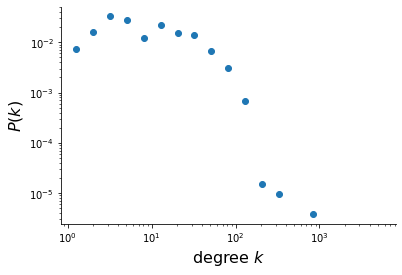

In [ ]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()